In [2]:
# importing necessary libraries
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import pairwise_distances
import warnings
warnings.filterwarnings('ignore')



In [3]:
# importing data set using pandas 
df = pd.read_csv("bank_transactions.csv")

In [4]:
df.head() # it show top 5 rows with all columns.

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [5]:
# rename columns 
df.rename(columns ={'TransactionID':'T_ID','CustomerID':'ID','CustomerDOB':'DOB','CustGender':'Gen','CustLocation':'Loc','CustAccountBalance':'acc_bal','TransactionDate':'T_date','TransactionTime':'T_time','TransactionAmount (INR)':'T_amt'}, inplace = True)

In [6]:
# To get summary of data set.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   T_ID     1048567 non-null  object 
 1   ID       1048567 non-null  object 
 2   DOB      1045170 non-null  object 
 3   Gen      1047467 non-null  object 
 4   Loc      1048416 non-null  object 
 5   acc_bal  1046198 non-null  float64
 6   T_date   1048567 non-null  object 
 7   T_time   1048567 non-null  int64  
 8   T_amt    1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


This is one big data With 6 object ,2 float & 1 int column\
DOB & T_date  is also in Object we need convert in date formate.



In [7]:
df.describe().T  # to get statistical summary of a Data set.

,count,mean,std,min,25%,50%,75%,max
acc_bal,1046198.0,115403.540056,846485.380601,0.0,4721.76,16792.18,57657.36,1.150355e+08
T_time,1048567.0,157087.529393,51261.854022,0.0,124030.00,164226.00,200010.00,2.359590e+05
T_amt,1048567.0,1574.335003,6574.742978,0.0,161.00,459.03,1200.00,1.560035e+06


In [8]:
df.nunique() # to get unique value in data set 

T_ID       1048567
ID          884265
DOB          17254
Gen              3
Loc           9355
acc_bal     161328
T_date          55
T_time       81918
T_amt        93024
dtype: int64

In [9]:
# if their is null value we can find out using 'isnull' function
df.isnull().sum()

T_ID          0
ID            0
DOB        3397
Gen        1100
Loc         151
acc_bal    2369
T_date        0
T_time        0
T_amt         0
dtype: int64

There are some null value in DOB(Customber Birth date), Gen(Gender), Loc(custober Loction),acc_bal(customber Account balence)\
we going to remove them.

In [10]:
# To remove null value we can use dropna function.
df.dropna(inplace=True)
df.isnull().sum()

T_ID       0
ID         0
DOB        0
Gen        0
Loc        0
acc_bal    0
T_date     0
T_time     0
T_amt      0
dtype: int64

In [11]:
#check for duplication
df.duplicated().sum()

0

No duplicate values

In [12]:
df.Gen.value_counts()

Gen
M    760978
F    280635
T         1
Name: count, dtype: int64

In Gender 3 uniuqe value Male , Female & Transgender as represented M,F,T
But T value is just only 1 , it might be human error \
so we going to remove T

In [13]:
df.drop(df[df['Gen']=='T'].index ,inplace=True)

In [14]:
df.DOB.value_counts()

DOB
1/1/1800    56291
1/1/89        809
1/1/90        784
6/8/91        698
1/1/91        665
            ...  
2/12/51         1
20/3/52         1
26/9/47         1
4/10/41         1
24/10/44        1
Name: count, Length: 17233, dtype: int64

As we can see there is problem in DOB , some 1800 Birth Date value in data set.


In [15]:
df.drop(df[df['DOB']=='1800-01-01'].index ,inplace=True)

In [16]:
# convert type of columns TransactionDate,CustomerDOB from string to datetime
df['T_date'] = pd.to_datetime(df['T_date'])
df['DOB'] = pd.to_datetime(df['DOB'])
df.head()

,T_ID,ID,DOB,Gen,Loc,acc_bal,T_date,T_time,T_amt
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5


some DOB value are 2057 so we need to Treat them & geat proper value

In [17]:
df.loc[df.DOB.dt.year >= 2024, 'DOB'] = df.loc[df.DOB.dt.year >= 2024, 'DOB'] - pd.DateOffset(years = 100)
df.head()

,T_ID,ID,DOB,Gen,Loc,acc_bal,T_date,T_time,T_amt
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5


In [18]:
'''calculate customer age :
   CustomerDOB is the birth date of the customer , TransactionDate : is the date of transaction that customer is done
'''
df['Age'] = df['T_date'].dt.year - df['DOB'].dt.year

df['Age']


0          22
1          59
2          20
3          43
4          28
           ..
1048562    26
1048563    24
1048564    27
1048565    38
1048566    32
Name: Age, Length: 1041613, dtype: int32

In [19]:
df.drop(columns=['T_time'],inplace=True) # T_time (Transaction Time ) in my opinian it's not that usefull so droping the column will be better

In [20]:
num_col = df.select_dtypes(include=np.number) # creating veriable for numerial value
cat_col = df.select_dtypes(exclude=np.number) # cerating  veriable for catogorical value

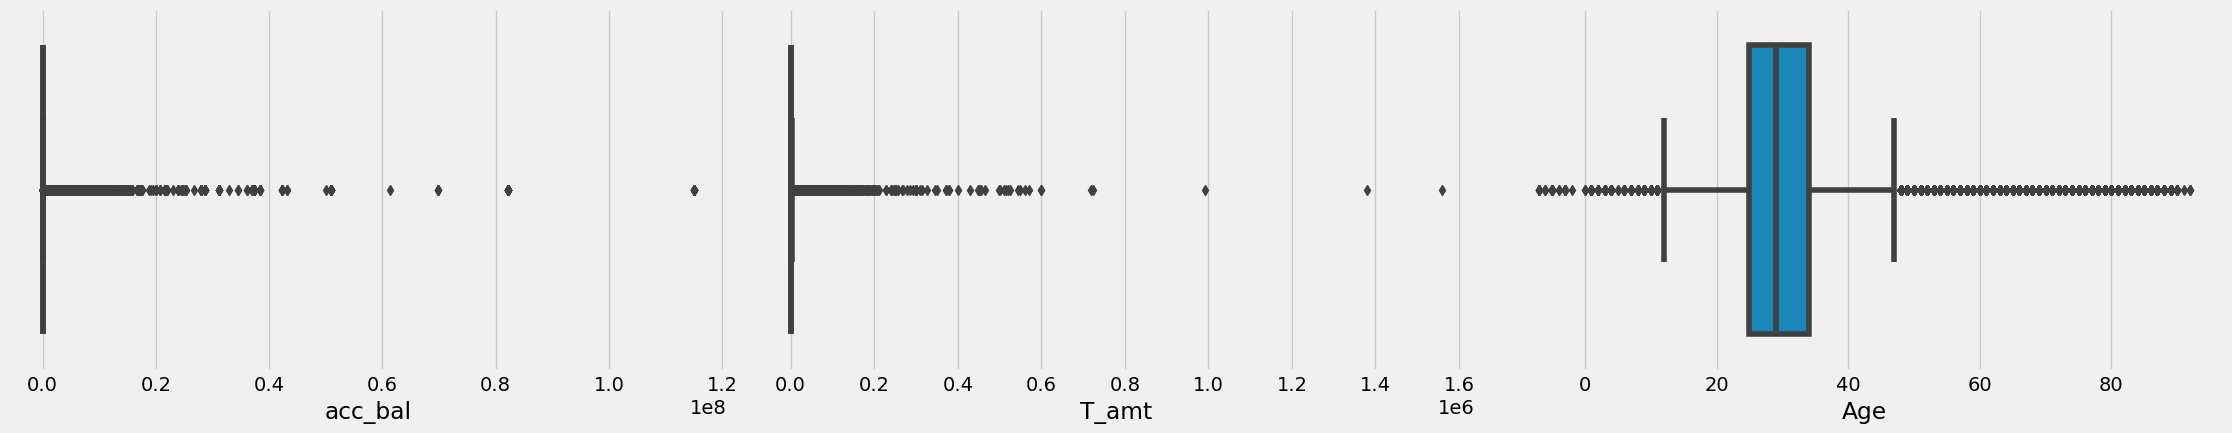

In [27]:
# Creating boxplot for identify  Outlier 
plt.style.use("fivethirtyeight")
plt.figure(figsize=(30,30))
for index,column in enumerate(num_col):
    plt.subplot(7,4,index+1)
    sns.boxplot(data=num_col,x=column)
    
plt.tight_layout(pad = 1.0)

There is no outliers.I can not say that there is a outliers.May Some variables seem like outliers but they are not, I decided spare any data.

# EDA

In [28]:
df1 = df.copy() # creating a duplicate dataset

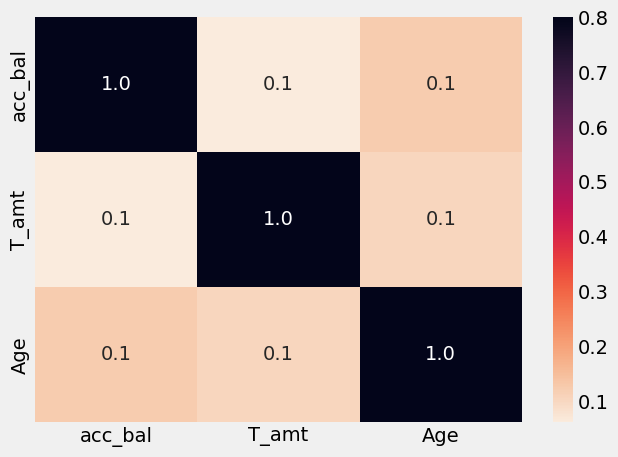

In [29]:
# correlation between features
plt.figure(figsize=(7,5))
correlation= df1.corr(numeric_only=True)
sns.heatmap(correlation,vmin=None,
    vmax=0.8,
    cmap='rocket_r',
    annot=True,
    fmt='.1f',
   cbar=True);

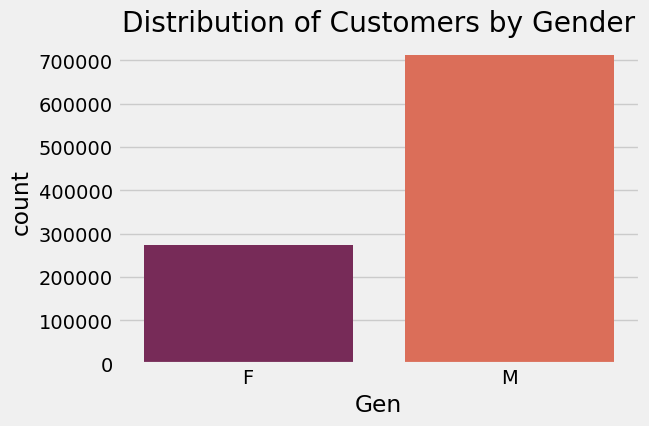

In [30]:
# 1. Distribution of customers by gender (CustGender)
plt.figure(figsize=(6, 4))
sns.countplot(x='Gen',data = df1, palette='rocket')
plt.title('Distribution of Customers by Gender')
plt.show()

Male customber is higher than female

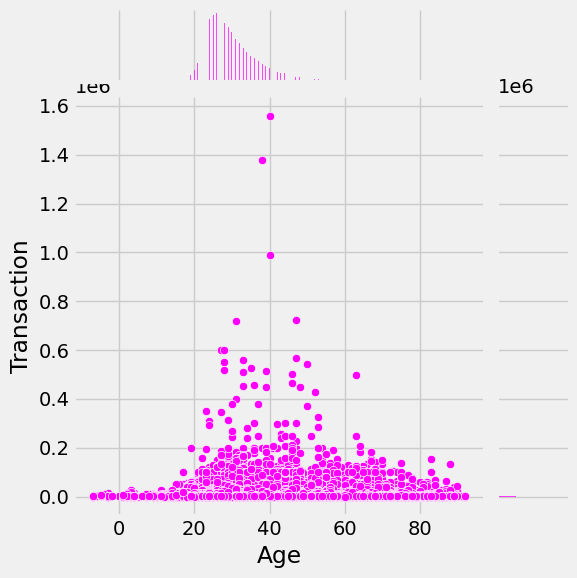

In [31]:
# Creating a joint plot
sns.jointplot(x="Age", y="T_amt", data=df1, kind="scatter",palette='rocket',color='magenta')
plt.xlabel('Age')
plt.ylabel('Transaction')
plt.show()

Conclusion : age 20 to 60 is more active than 80 above. & in age 20-40 has high transaction compare to rest.


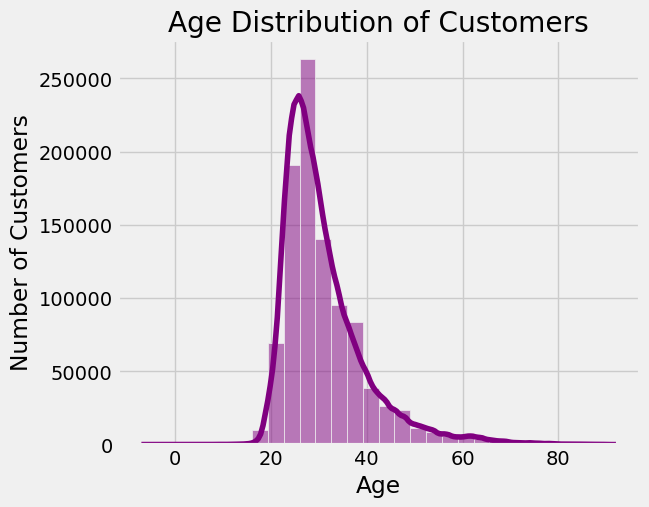

In [32]:
# 2. Age distribution of customers based on "CustomerDOB" column
plt.figure(figsize=(6, 5))
sns.histplot(df1['Age'], bins= 30, kde=True, color='purple')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

Conclusion : Total number of customber belong to  20-40 age group

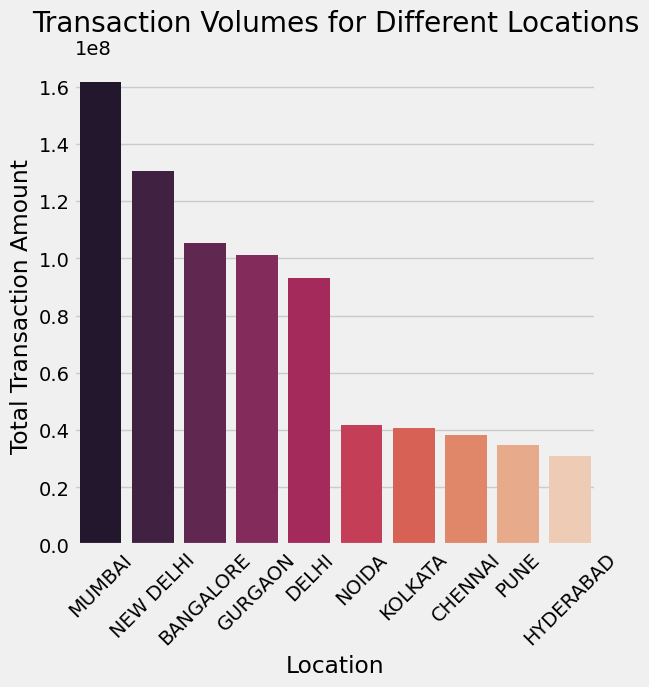

In [33]:
location_transaction_volumes = df1.groupby('Loc')['T_amt'].sum().nlargest(10).sort_values(ascending = False)

# Visualize the transaction volumes for each location using a bar plot
plt.figure(figsize=(6, 6))
sns.barplot(x=location_transaction_volumes.index, y=location_transaction_volumes.values, palette='rocket')
plt.title('Transaction Volumes for Different Locations')
plt.xlabel('Location')
plt.ylabel('Total Transaction Amount ')
plt.xticks(rotation=45)
plt.show()


Conclusion : Mumbai , New delhi has largest active Transaction & high num of Transaction amount.\
            and it clearly indicate that Mumbai has large number of customber base.
            let's confirm that.

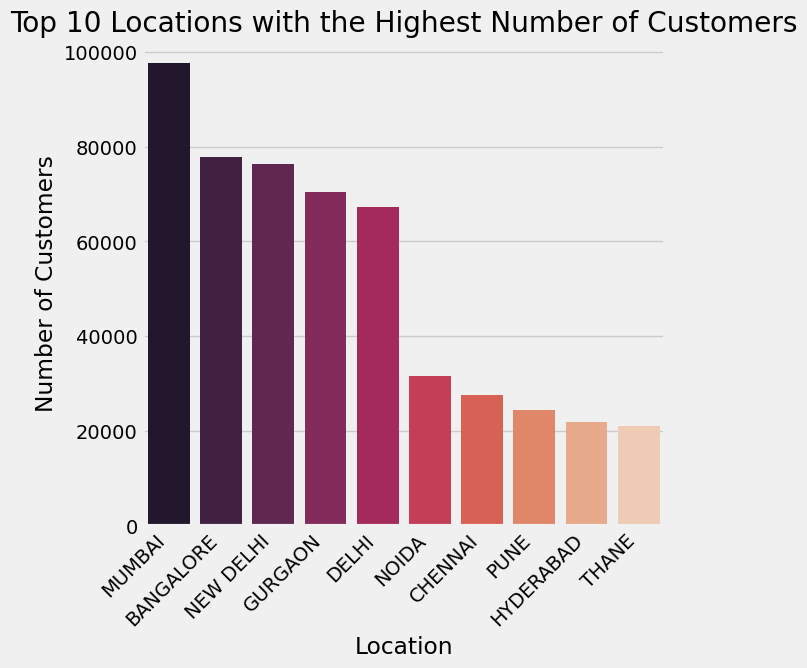

In [34]:
#  Location with the highest number of customers 
location_counts = df1['Loc'].value_counts().nlargest(10)
plt.figure(figsize=(6, 6))
sns.barplot(x=location_counts.index, y=location_counts.values, palette='rocket')
plt.title('Top 10 Locations with the Highest Number of Customers')
plt.xlabel('Location')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.show()

As we know mumbai has largest amount of customber base.

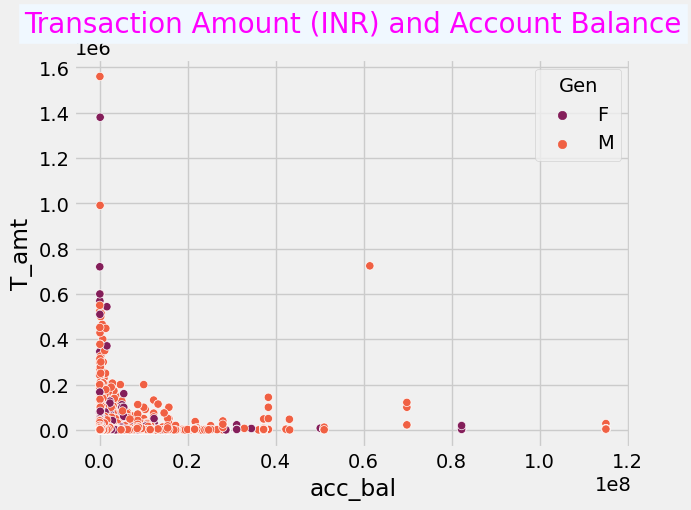

In [35]:
plt.style.use("fivethirtyeight")
sns.scatterplot(x='acc_bal',y='T_amt',data=df1,palette='rocket',hue='Gen' )
plt.title("Transaction Amount (INR) and Account Balance",
          fontsize='20',
          backgroundcolor='AliceBlue',
          color='magenta');

Large number of transaction amount have low amount of account balence.

<Axes: xlabel='T_date', ylabel='T_amt'>

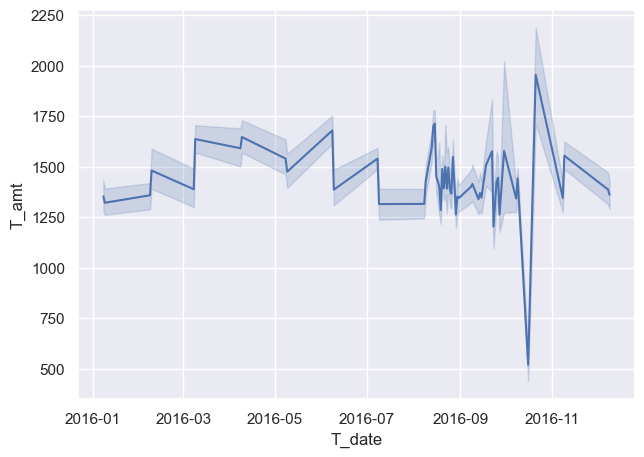

In [37]:
# ploat lineplot to chake any trend in 
sns.set_theme(style="darkgrid")
sns.lineplot(x="T_date", y="T_amt", data=df1)
             
           

Conclusion: It not show any trend & but there is a dawnfall of Transaction in Octomber month 2016\
now let's see in account balance  

<Axes: xlabel='T_date', ylabel='acc_bal'>

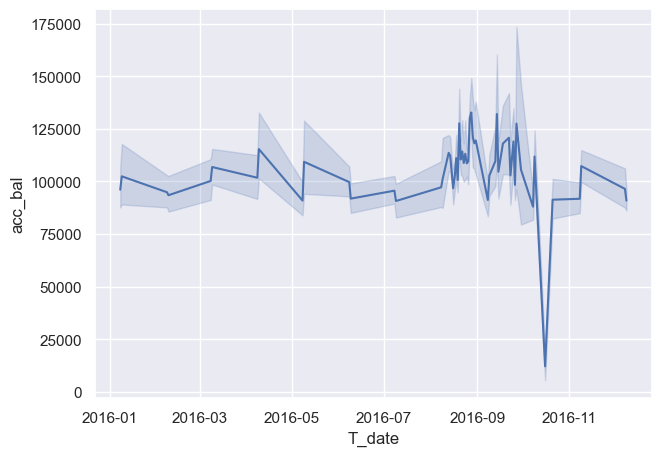

In [38]:
sns.set_theme(style="darkgrid")
sns.lineplot(x="T_date", y="acc_bal", data=df1)

In account balance there is also a down peak .
so it is defficult to conclude any reson.

Now the data is cleaned and I will perform RFM on it

# RFM ANALYSIS

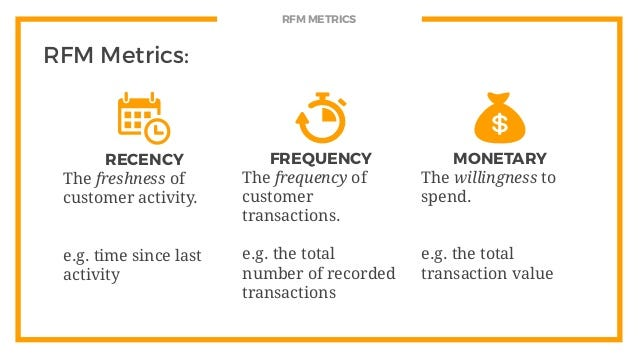

Recency: number of days since the last purchase or order so I will create a new column of TransactionDate to subtract the last transaction from the first transaction

In [39]:
current_date = df1['T_date'].max()

In [50]:
#Creating MRF Table Strategy

MRF_df = df1.groupby("ID").agg({
                                        "T_ID" : "count",
                                        "Gen" : "first",
                                        "Loc":"first",
                                        "acc_bal"  : "mean",
                                        "T_amt" : "sum",
                                        "Age" : "median",                                    
                                       "T_date":lambda x: (current_date - x.max()).days,  # Recency calculation
                        })

MRF_df = MRF_df.reset_index()
MRF_df.head()

,ID,T_ID,Gen,Loc,acc_bal,T_amt,Age,T_date
0,C1010011,2,F,NOIDA,76340.635,5106.0,28.5,74
1,C1010012,1,M,MUMBAI,24204.490,1499.0,22.0,117
2,C1010014,2,F,MUMBAI,100112.950,1455.0,28.0,154
3,C1010018,1,F,CHAMPARAN,496.180,30.0,26.0,85
4,C1010024,1,M,KOLKATA,87058.650,5000.0,51.0,113


In [41]:
MRF_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839081 entries, 0 to 839080
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   ID       839081 non-null  object 
 1   T_ID     839081 non-null  int64  
 2   Gen      839081 non-null  object 
 3   Loc      839081 non-null  object 
 4   acc_bal  839081 non-null  float64
 5   T_amt    839081 non-null  float64
 6   Age      839081 non-null  float64
 7   T_date   839081 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 51.2+ MB


In [51]:
MRF_df.drop(columns=["ID"],inplace=True) # droping ID column
MRF_df.rename(columns={"T_ID":"Frequency"},inplace=True) # rename column
MRF_df.rename(columns={"T_date":"Recency"},inplace=True) # rename column
MRF_df.head()

,Frequency,Gen,Loc,acc_bal,T_amt,Age,Recency
0,2,F,NOIDA,76340.635,5106.0,28.5,74
1,1,M,MUMBAI,24204.490,1499.0,22.0,117
2,2,F,MUMBAI,100112.950,1455.0,28.0,154
3,1,F,CHAMPARAN,496.180,30.0,26.0,85
4,1,M,KOLKATA,87058.650,5000.0,51.0,113


In [43]:
MRF_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839081 entries, 0 to 839080
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Frequency  839081 non-null  int64  
 1   Gen        839081 non-null  object 
 2   Loc        839081 non-null  object 
 3   acc_bal    839081 non-null  float64
 4   T_amt      839081 non-null  float64
 5   Age        839081 non-null  float64
 6   Recency    839081 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 44.8+ MB


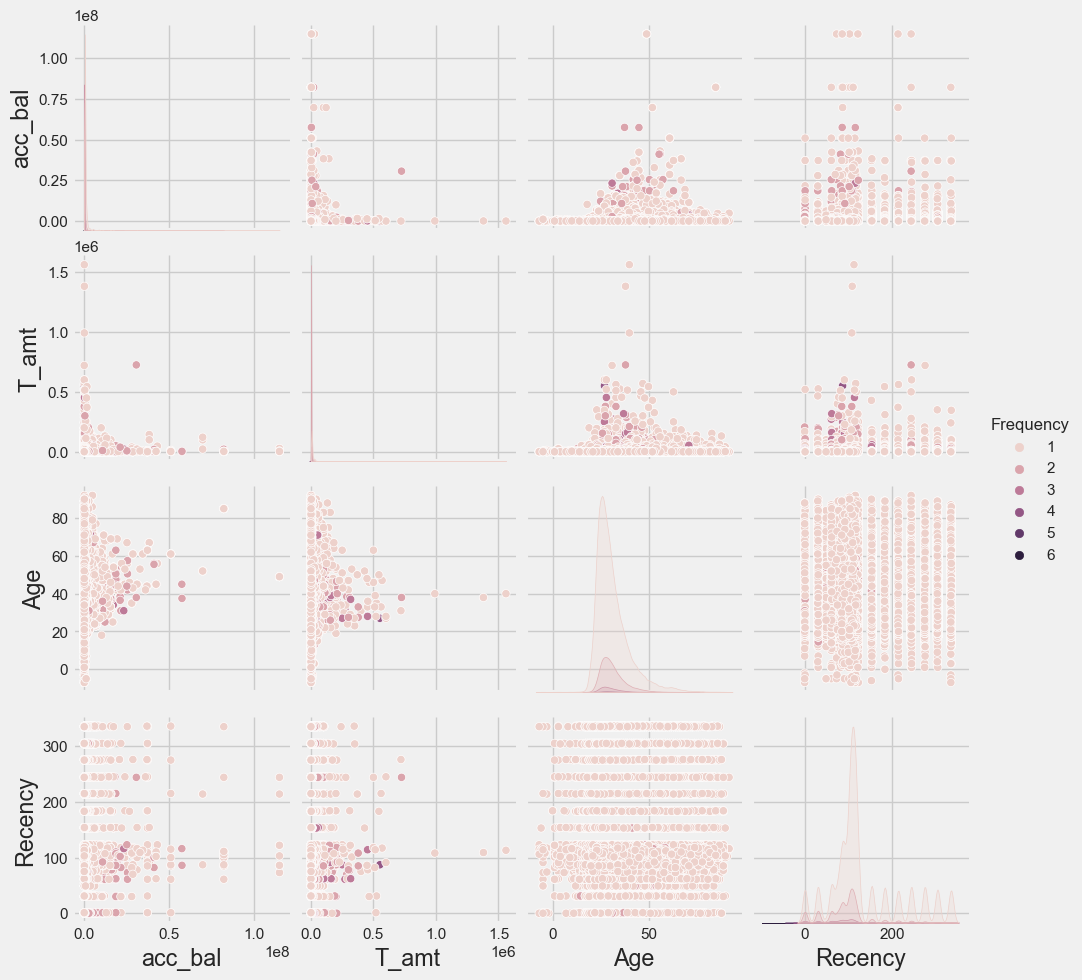

In [44]:
# plot pairplot so we can get inside of data
plt.style.use("fivethirtyeight")
sns.pairplot(MRF_df,hue='Frequency');

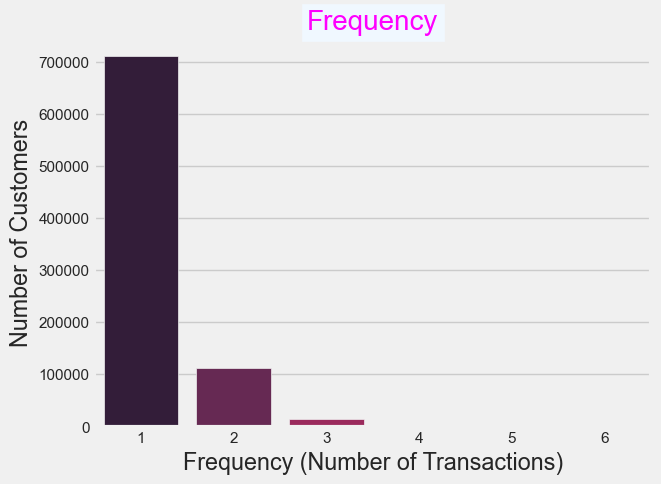

In [45]:
plt.style.use("fivethirtyeight")
chart=sns.countplot(x='Frequency',data=MRF_df,palette='rocket', order = MRF_df['Frequency'].value_counts().index)
plt.xlabel('Frequency (Number of Transactions)')
plt.ylabel('Number of Customers')
plt.title("Frequency",
          fontsize='20',
          backgroundcolor='AliceBlue',
          color='magenta');

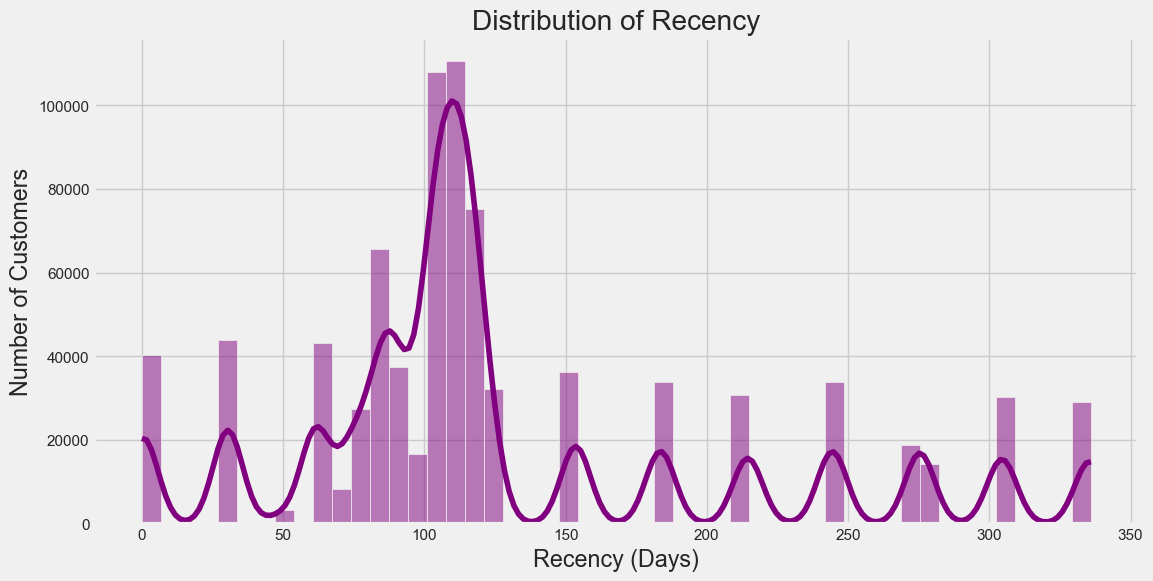

In [46]:
plt.figure(figsize=(12, 6))
sns.histplot(MRF_df['Recency'], bins=50, kde=True, color='purple')
plt.title('Distribution of Recency')
plt.xlabel('Recency (Days)')
plt.ylabel('Number of Customers')
plt.show()

<Figure size 1200x600 with 0 Axes>

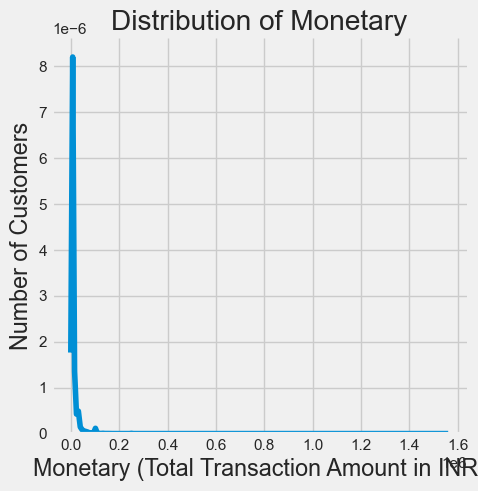

In [47]:
plt.figure(figsize=(12, 6))
sns.displot(MRF_df, x="T_amt", kind="kde")
plt.title('Distribution of Monetary')
plt.xlabel('Monetary (Total Transaction Amount in INR)')
plt.ylabel('Number of Customers')
plt.show()



# Feature Engineering

In [52]:
# Droping Frequency & Recency columns
MRF_df.drop(columns=['Frequency','Recency'],inplace=True)
MRF_df.head()

,Gen,Loc,acc_bal,T_amt,Age
0,F,NOIDA,76340.635,5106.0,28.5
1,M,MUMBAI,24204.490,1499.0,22.0
2,F,MUMBAI,100112.950,1455.0,28.0
3,F,CHAMPARAN,496.180,30.0,26.0
4,M,KOLKATA,87058.650,5000.0,51.0


In [53]:
le = preprocessing.LabelEncoder()

MRF_df['Gen']= le.fit_transform(MRF_df['Gen'])
MRF_df['Loc']= le.fit_transform(MRF_df['Loc'])
MRF_df.head()

,Gen,Loc,acc_bal,T_amt,Age
0,0,4984,76340.635,5106.0,28.5
1,1,4474,24204.490,1499.0,22.0
2,0,4474,100112.950,1455.0,28.0
3,0,1286,496.180,30.0,26.0
4,1,3622,87058.650,5000.0,51.0


In [54]:
# data scaling
df_scaled=StandardScaler().fit_transform(MRF_df)
df_scaled=pd.DataFrame(df_scaled,columns=MRF_df.columns)
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839081 entries, 0 to 839080
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Gen      839081 non-null  float64
 1   Loc      839081 non-null  float64
 2   acc_bal  839081 non-null  float64
 3   T_amt    839081 non-null  float64
 4   Age      839081 non-null  float64
dtypes: float64(5)
memory usage: 32.0 MB


In [66]:
df_scaled=df_scaled.sample(n=20000,random_state=42)


# t-SNE

It is a non-linear Dimensionality reduction technique.\
It tries to preserve the local structure(cluster) of data.\
It is one of the best dimensionality reduction technique.\


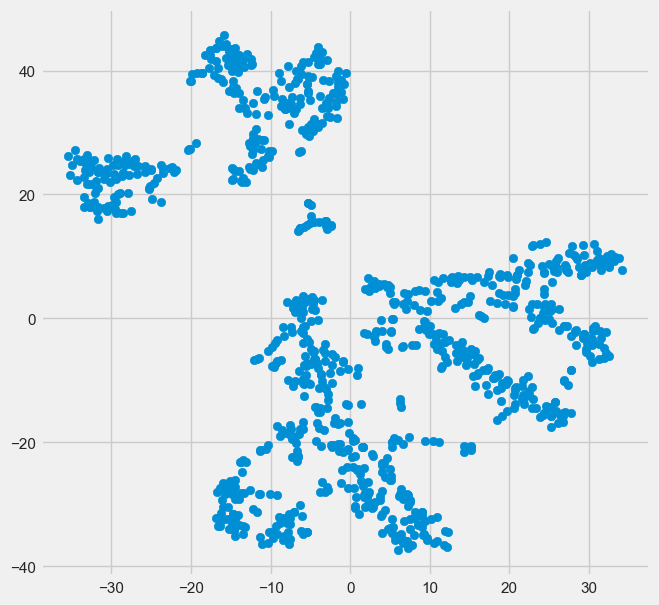

In [70]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(df_scaled)
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.show()


# K-Means

In [71]:
# Choose clustering algorithm

error = []
for n_clusters in range(1, 10):
    model = KMeans(init='k-means++',
                   n_clusters=n_clusters,
                   max_iter=500,
                   random_state=22)
    model.fit(tsne_data)
    error.append(model.inertia_)


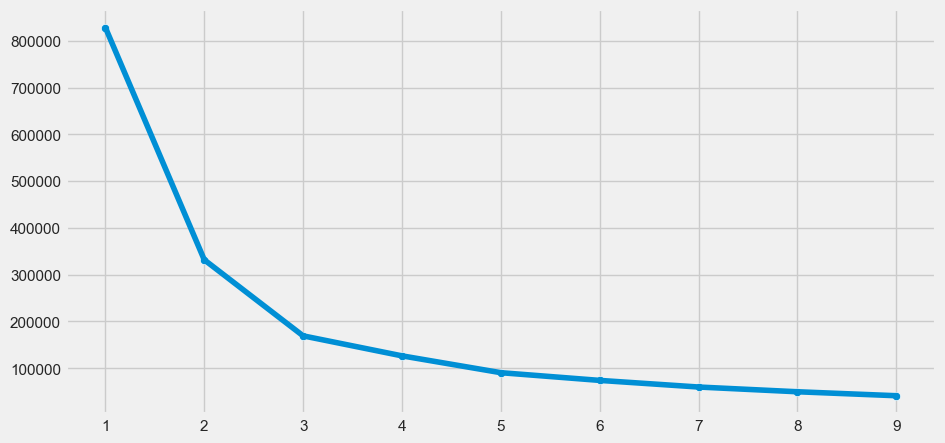

In [72]:
# Elbow method
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, 10), y=error)
sns.scatterplot(x=range(1, 10), y=error)
plt.show()

In [73]:
# Assign cluster labels to test set

# create clustering model with optimal k=5
model = KMeans(init='k-means++',
               n_clusters=3,
               max_iter=500,
               random_state=22)
segments = model.fit_predict(tsne_data)


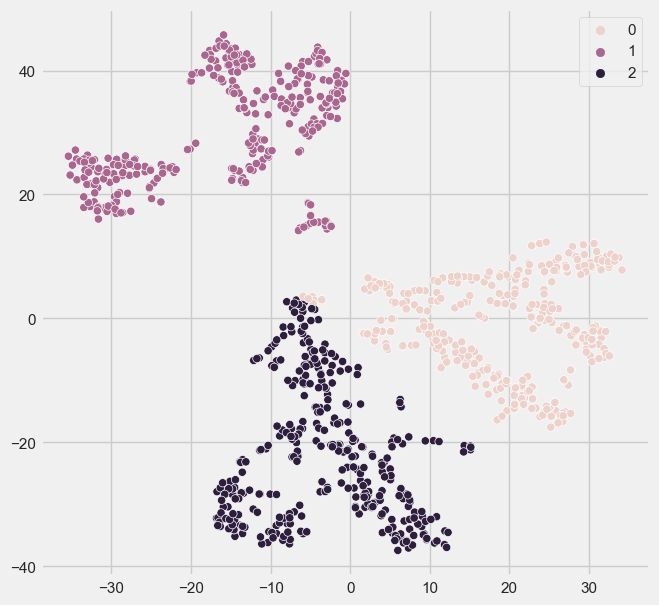

In [74]:
plt.figure(figsize=(7, 7))
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=segments)
plt.show()

# Modeling The Data Using DBSCAN 
It does not require the number of clusters as input.\
It is can detect outliers while finding clusters.\
DBSCAN algorithm can detect clusters that are complex or randomly shaped and sized

# Finding the Optimal value of Epsilon
The average distance between each point and its k nearest neighbors is calculated where k = the MinPts selected by us. We then plot the average k-distances in ascending order on a k-distance graph

The optimal value for epsilon is the point with maximum curvature or bend, i.e. at the greatest slope.

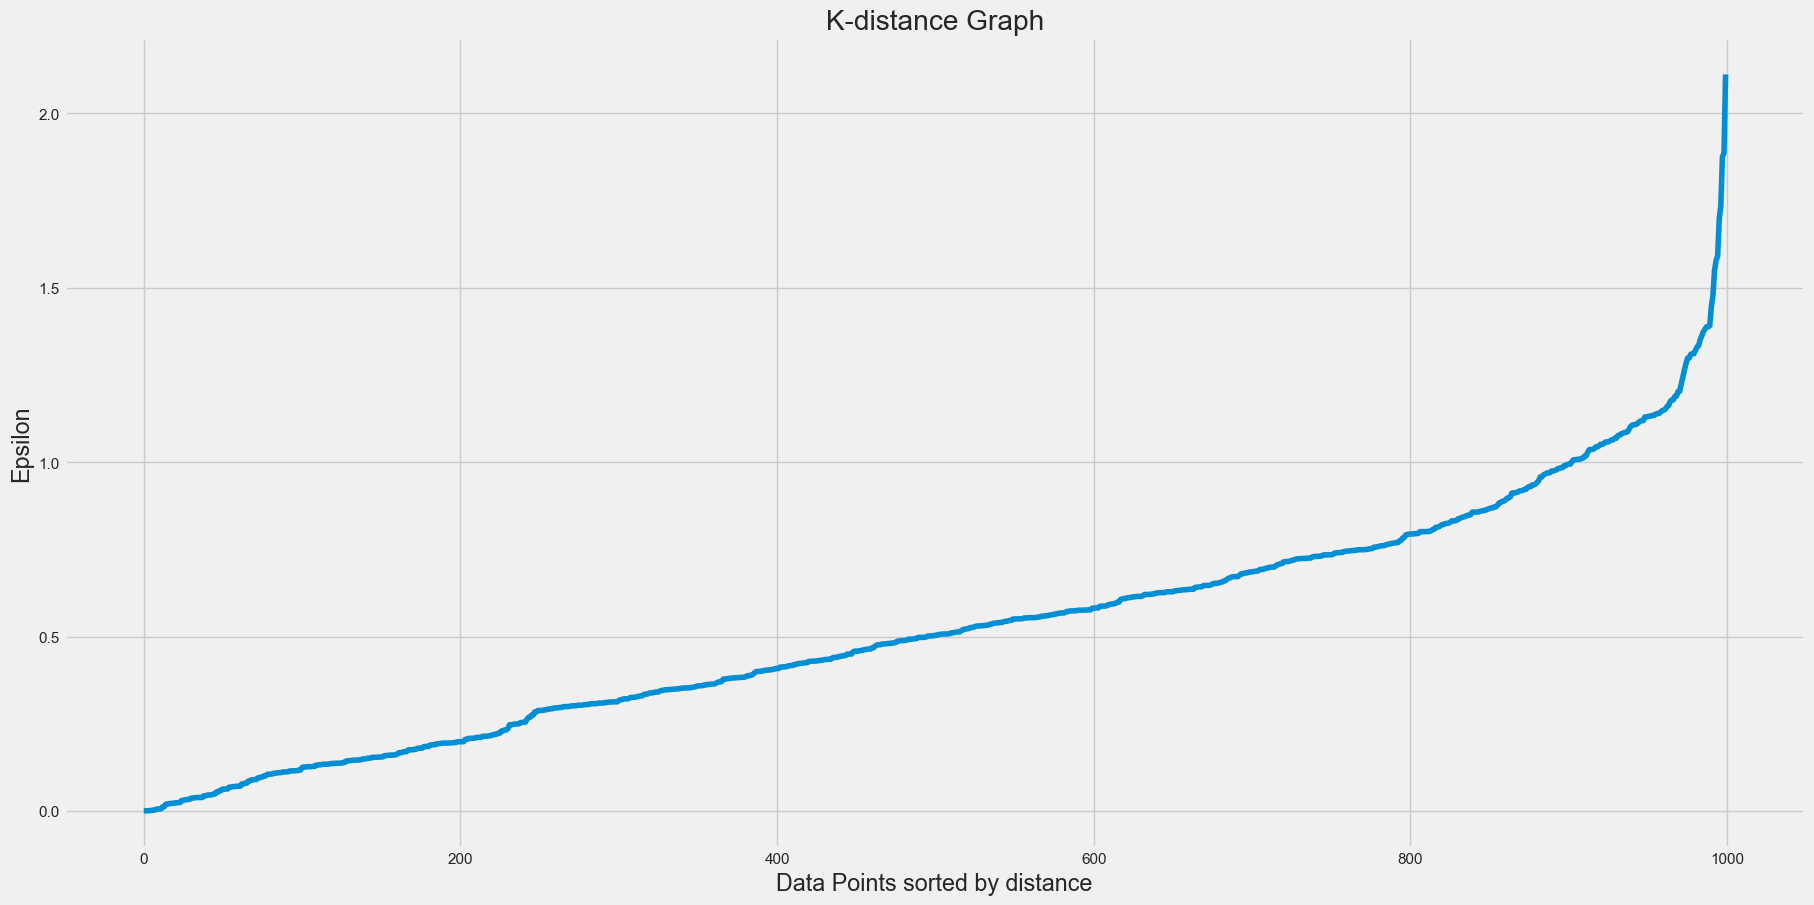

In [75]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(tsne_data)
distances, indices = nbrs.kneighbors(tsne_data)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()



['y', 'b', 'g', 'r']


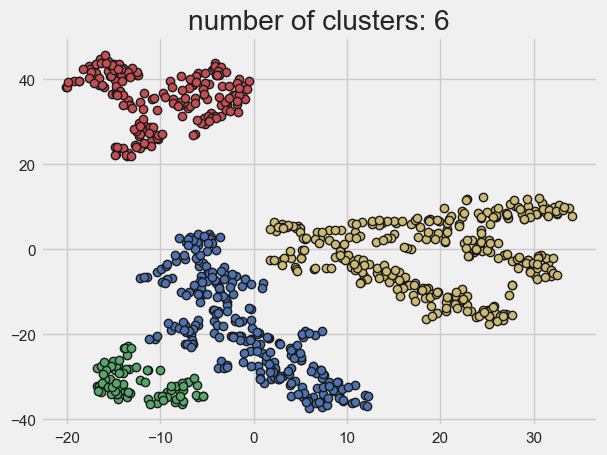

In [103]:
db = DBSCAN(eps=3.3, min_samples=13).fit(tsne_data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
	if k == -1:
		# Black used for noise.
		col = 'k'

	class_member_mask = (labels == k)

	xy = tsne_data[class_member_mask & core_samples_mask]
	plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

	xy = tsne_data[class_member_mask & ~core_samples_mask]
	plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()



# Hierarchical clustering
Hierarchical clustering is where you build a dendrogram to represent data, where each group links to two or more successor groups. The groups are nested and organized as a tree, which ideally ends up as a meaningful classification scheme.

Each node in the cluster tree contains a group of similar data; Nodes group on the graph next to other, similar nodes. Clusters at one level join with clusters in the next level up, using a degree of similarity. The process carries on until all nodes are in the tree, which gives a visual snapshot of the data contained in the whole set. The total number of clusters is not predetermined before you start the tree creation

Agglomerative \
This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

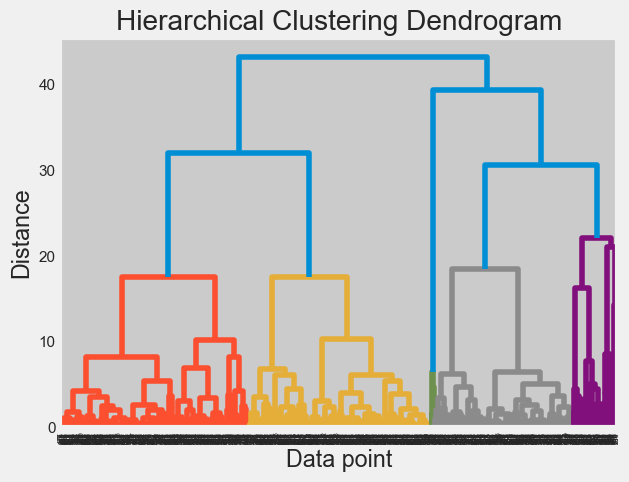

In [104]:

# Perform hierarchical clustering
Z = linkage(df_scaled, 'ward')  #  we are using linkage function from the scipy.cluster.hierarchy module .
''''
ward' is the method used to calculate the distance between newly formed clusters.
‘ward’ minimizes the variance of the clusters being merged.
'''

# Plot dendrogram
dendrogram(Z) 
 
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
plt.show()

from above dendrograph we can clearly see there are  4 cluster in our model.

In [106]:
from sklearn.cluster import AgglomerativeClustering
cluster_loc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster_loc.fit_predict(df_scaled)

array([3, 1, 1, 1, 0, 1, 0, 3, 3, 0, 3, 0, 3, 1, 3, 3, 0, 3, 0, 3, 1, 3,
       3, 1, 3, 1, 3, 3, 0, 1, 0, 1, 0, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 0,
       3, 3, 1, 0, 0, 3, 1, 1, 1, 0, 1, 0, 3, 1, 3, 1, 3, 1, 3, 3, 3, 0,
       1, 0, 3, 3, 2, 0, 1, 0, 1, 0, 1, 3, 0, 3, 1, 3, 0, 1, 3, 0, 0, 0,
       0, 0, 3, 1, 3, 3, 2, 3, 1, 0, 3, 0, 0, 0, 1, 3, 3, 1, 1, 3, 0, 3,
       1, 0, 3, 3, 3, 0, 1, 1, 1, 0, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 0, 0,
       1, 0, 3, 3, 0, 0, 1, 0, 0, 1, 3, 1, 3, 0, 1, 0, 3, 1, 0, 0, 1, 0,
       0, 3, 0, 3, 3, 0, 0, 0, 3, 0, 1, 1, 0, 1, 0, 3, 0, 1, 0, 3, 3, 1,
       0, 3, 0, 3, 0, 1, 1, 1, 3, 0, 0, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 0,
       1, 3, 0, 1, 1, 3, 0, 1, 0, 0, 1, 1, 1, 3, 1, 3, 0, 3, 1, 3, 3, 1,
       3, 0, 1, 1, 0, 1, 0, 0, 1, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 0, 0, 1,
       1, 3, 0, 0, 1, 1, 3, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0,
       3, 3, 3, 3, 3, 2, 0, 3, 3, 1, 0, 0, 1, 3, 3, 1, 1, 3, 0, 3, 1, 1,
       1, 1, 3, 1, 3, 0, 1, 3, 0, 3, 1, 0, 1, 0, 0,

(-0.25, 10.0)

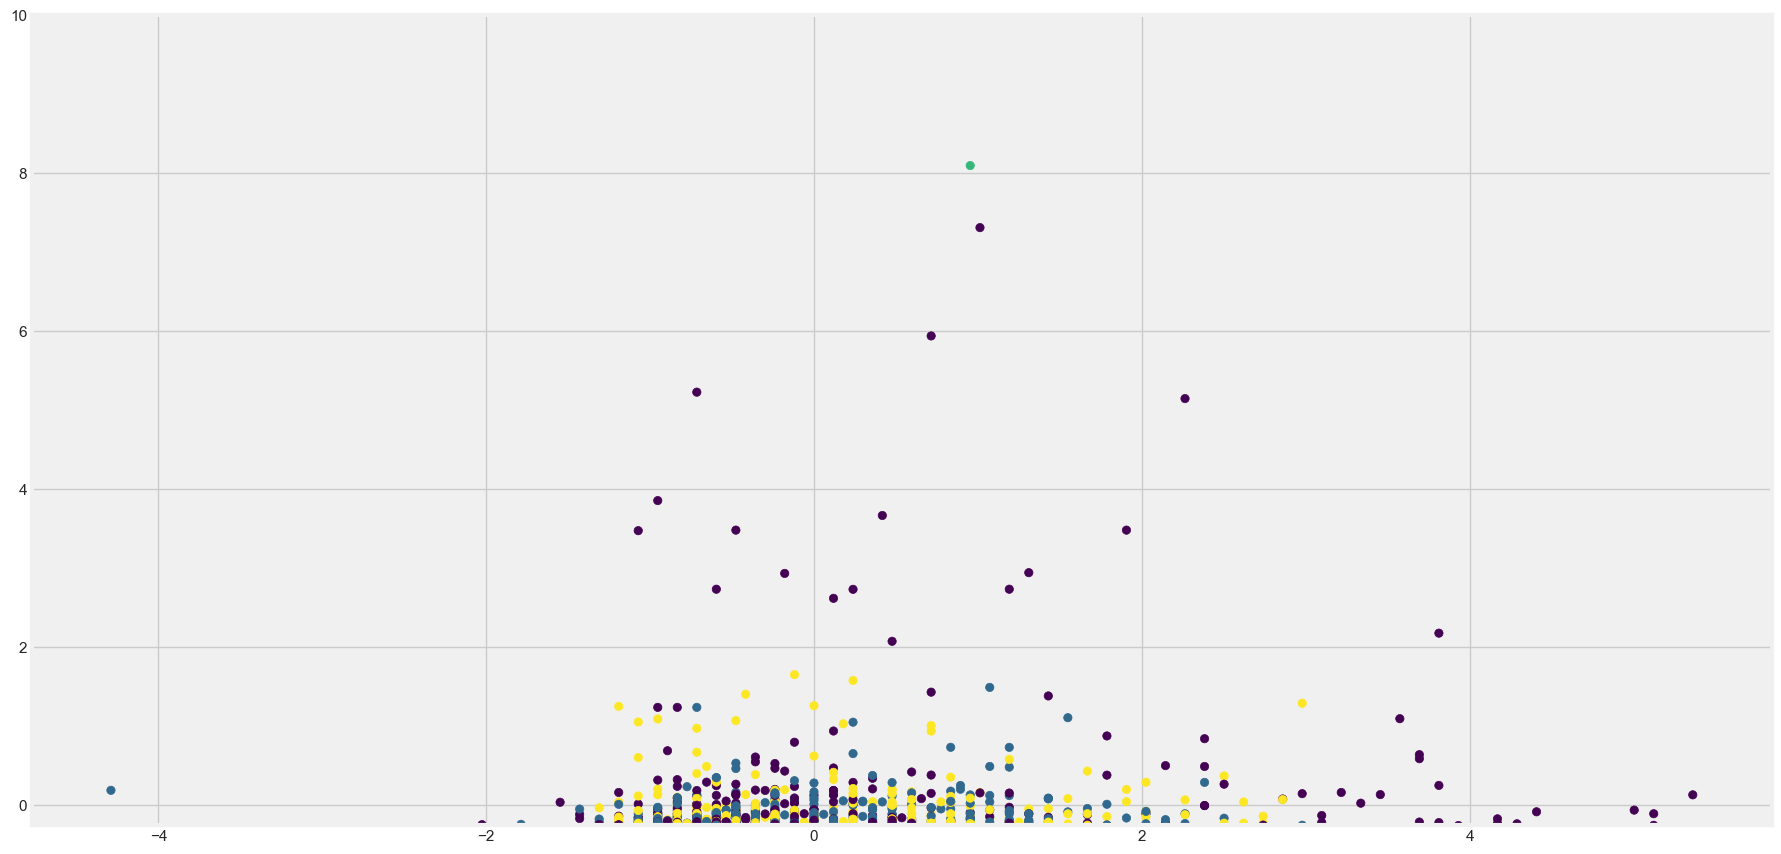

In [107]:
plt.figure(num=None, figsize=(20, 10), facecolor='w', edgecolor='k')
plt.scatter(df_scaled["Age"], df_scaled["T_amt"], c =cluster_loc.labels_, cmap='viridis');
plt.ylim(-0.25,10)

(-0.25, 10.0)

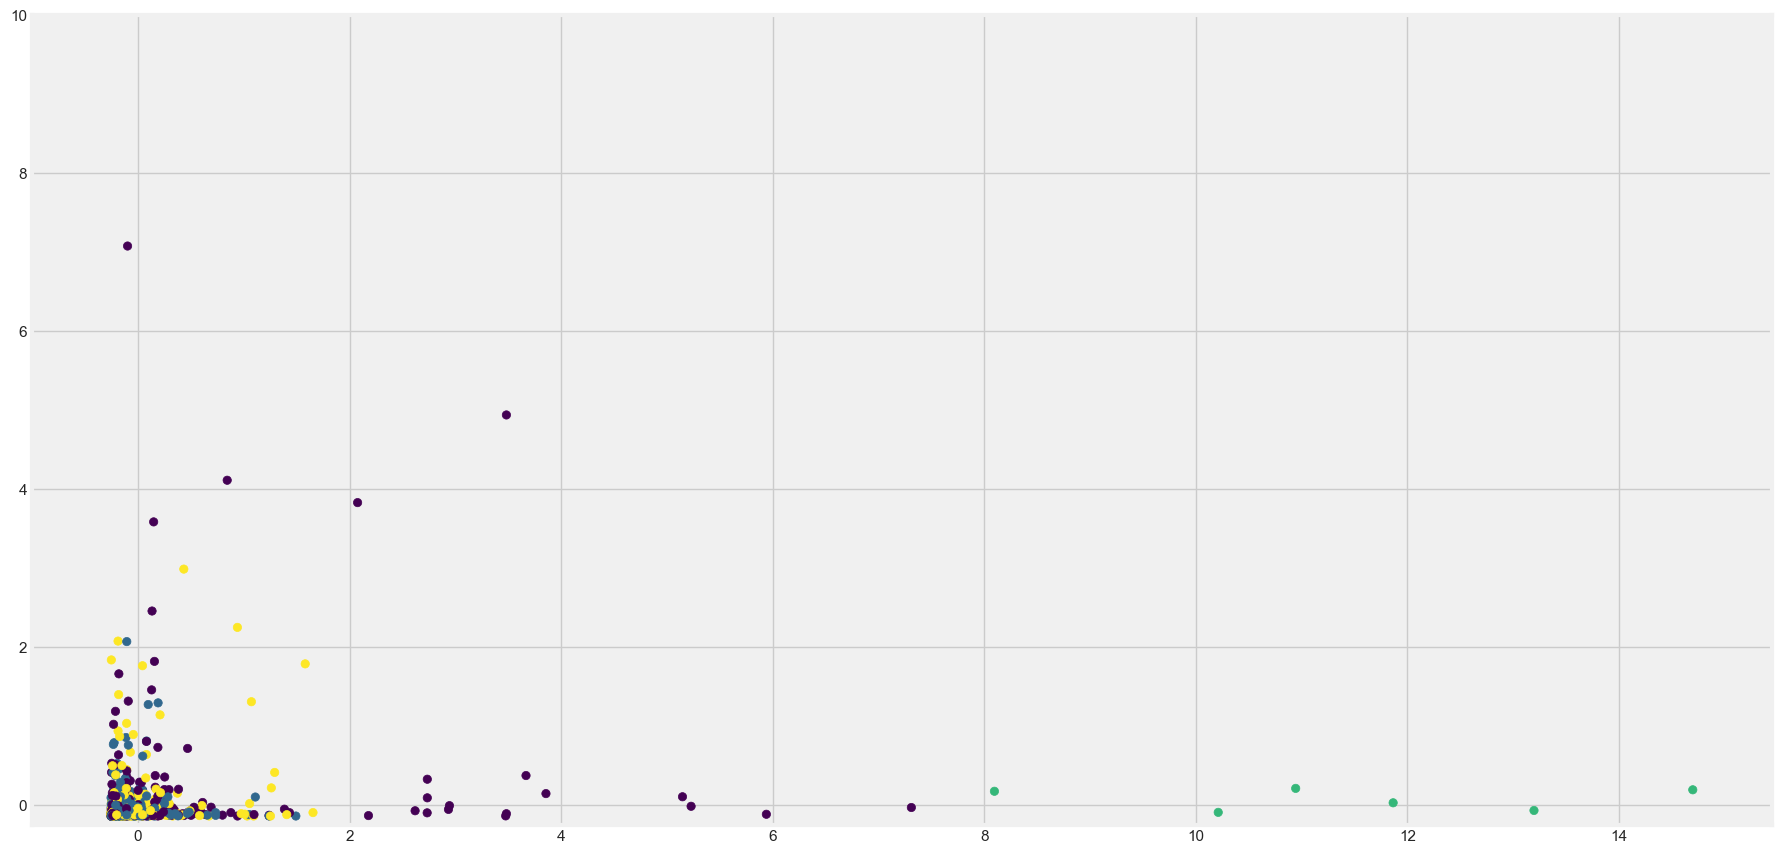

In [108]:
plt.figure(num=None, figsize=(20, 10), facecolor='w', edgecolor='k')
plt.scatter(df_scaled["T_amt"], df_scaled["acc_bal"], c=cluster_loc.labels_, cmap='viridis');
plt.ylim(-0.25,10)

(-0.25, 10.0)

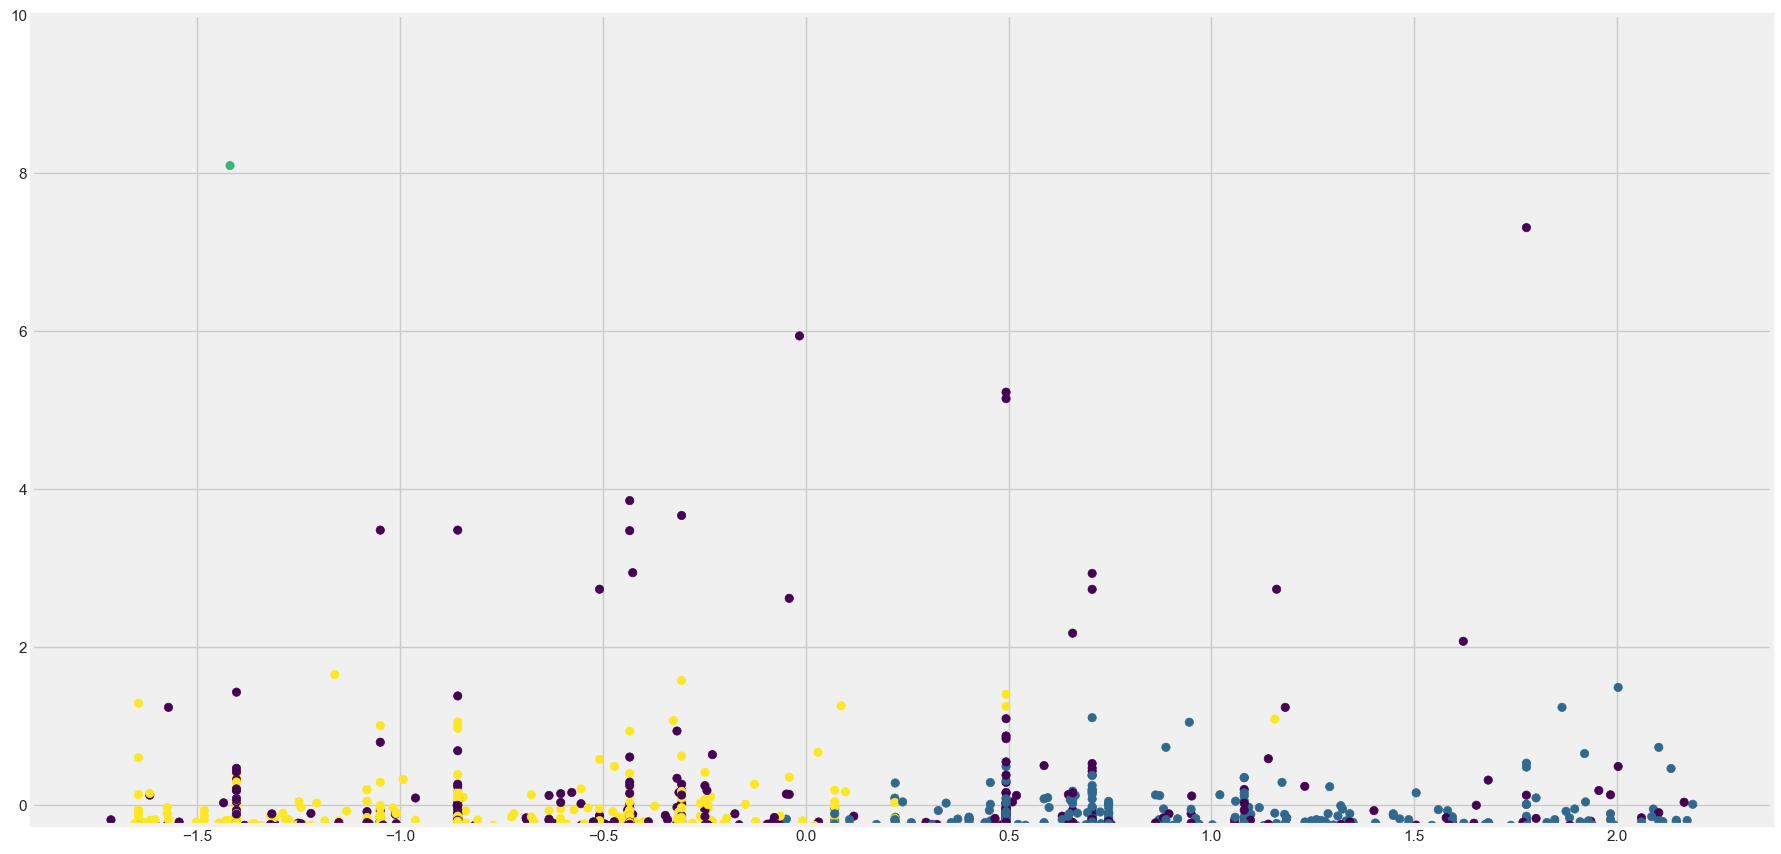

In [109]:
plt.figure(num=None, figsize=(20, 10), facecolor='w', edgecolor='k')
plt.scatter(df_scaled["Loc"], df_scaled["T_amt"], c=cluster_loc.labels_, cmap='viridis');
plt.ylim(-0.25,10)